# Курсовой проект для курса "Python для Data Science"

Автор: **Иванов Сергей**

In [594]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings

%matplotlib inline
warnings.filterwarnings('ignore')

## Загрузка даных

In [595]:
data = pd.read_csv('input/train.csv')

In [596]:
test = pd.read_csv('input/test.csv')

## Обработка данных

In [597]:
from sklearn.model_selection import train_test_split

In [598]:
train, valid = train_test_split(data, test_size=0.3, random_state=42)

In [599]:
train.shape, valid.shape

((7000, 20), (3000, 20))

In [600]:
train.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,7000.000000,7000.000000,7000.000000,7000.000000,5514.000000,7000.000000,7000.000000,7000.000000,7.000000e+03,7000.000000,7000.000000,7000.000000,7000.000000,3642.000000,7000.000000,7000.000000,7000.000000
mean,8386.061714,50.560857,1.889286,56.307485,37.523283,6.490714,8.521286,12.654571,4.849634e+03,0.117840,24.767571,5364.425714,8.044571,1133.876167,1.313143,4.260571,214449.167390
std,4864.141324,43.744178,0.843116,20.507466,102.071817,33.999713,5.222043,6.851357,2.396436e+05,0.118599,17.583889,4011.768297,23.869975,1018.354716,1.488326,4.825024,92924.798790
min,0.000000,0.000000,0.000000,2.377248,0.370619,0.000000,1.000000,0.000000,1.912000e+03,0.000000,0.000000,168.000000,0.000000,30.000000,0.000000,0.000000,59174.778028
25%,4176.500000,19.000000,1.000000,41.744710,22.766442,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,325.000000,0.000000,1.000000,154599.240157
50%,8398.500000,37.000000,2.000000,52.633656,32.868499,6.000000,7.000000,14.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192290.039215
75%,12562.000000,75.000000,2.000000,65.981105,45.121115,9.000000,12.000000,17.000000,2.001000e+03,0.194489,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249080.956886
max,16796.000000,209.000000,19.000000,604.705972,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,627525.072788


In [601]:
mean_price = train['Price'].mean()
stat2 = train.groupby('Rooms', as_index=False)[['Price']].mean().rename(columns={'Price':'mean_price2'})

In [602]:

def clean_rooms(df, source_df):
    df.loc[df['Rooms'] > 6, 'Rooms'] = source_df['Rooms'].median()
    df.loc[df['Rooms'] < 1, 'Rooms'] = source_df['Rooms'].median()
    return df

In [603]:
#train = clean_rooms(train, train)

In [604]:
stat1 = train.groupby(['DistrictId', 'Rooms'], as_index=False)[['Price']].mean().rename(columns={'Price':'mean_price1'})
stat3 = train.groupby(['Social_1', 'Rooms'], as_index=False)[['Price']].mean().rename(columns={'Price':'mean_price3'})

In [605]:
def add_mean_price(df, stat1, stat2, stat3, mean_price):
    df = pd.merge(df, stat1, on=['DistrictId', 'Rooms'], how='left')
    df = pd.merge(df, stat2, on='Rooms', how='left')
    df = pd.merge(df, stat3, on=['Social_1', 'Rooms'], how='left')
    df['mean_price2'] = df['mean_price2'].fillna(mean_price)
    df['mean_price1'] = df['mean_price1'].fillna(df['mean_price2'])
    df['mean_price3'] = df['mean_price3'].fillna(df['mean_price2'])
    return df

In [606]:
def clean_square(df):
    df.loc[df['KitchenSquare'] < 4, 'KitchenSquare'] = 4
    df.loc[df['Square'] < 15, 'Square'] = 15
    return df

In [607]:
def prepare_data(df, source_df=train):
    df = clean_rooms(df, source_df)
    df = clean_square(df)
    df = add_mean_price(df, stat1, stat2, stat3, mean_price)
    return df

In [608]:
train = prepare_data(train)

In [609]:
train.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price,mean_price1,mean_price2,mean_price3
count,7000.000000,7000.000000,7000.000000,7000.000000,5514.000000,7000.000000,7000.000000,7000.000000,7.000000e+03,7000.000000,7000.000000,7000.000000,7000.000000,3642.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000
mean,8386.061714,50.560857,1.887143,56.318545,37.523283,7.507429,8.521286,12.654571,4.849634e+03,0.117840,24.767571,5364.425714,8.044571,1133.876167,1.313143,4.260571,214449.167390,214449.307057,214476.079913,214449.355558
std,4864.141324,43.744178,0.810599,20.482252,102.071817,33.860892,5.222043,6.851357,2.396436e+05,0.118599,17.583889,4011.768297,23.869975,1018.354716,1.488326,4.825024,92924.798790,75694.678480,53632.850289,66662.288601
min,0.000000,0.000000,1.000000,15.000000,0.370619,4.000000,1.000000,0.000000,1.912000e+03,0.000000,0.000000,168.000000,0.000000,30.000000,0.000000,0.000000,59174.778028,84250.557673,160134.810901,79182.682305
25%,4176.500000,19.000000,1.000000,41.744710,22.766442,4.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,325.000000,0.000000,1.000000,154599.240157,165911.129700,160134.810901,168764.538443
50%,8398.500000,37.000000,2.000000,52.633656,32.868499,6.000000,7.000000,14.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192290.039215,198197.383850,215287.628931,204300.402259
75%,12562.000000,75.000000,2.000000,65.981105,45.121115,9.000000,12.000000,17.000000,2.001000e+03,0.194489,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249080.956886,249140.409925,215287.628931,250914.683106
max,16796.000000,209.000000,6.000000,604.705972,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,627525.072788,595128.195352,386743.536446,585105.228671


In [610]:
valid = prepare_data(valid)

In [611]:
valid.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price,mean_price1,mean_price2,mean_price3
count,3000.000000,3000.000000,3000.000000,3000.000000,2373.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,1560.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,8377.215000,50.027333,1.892667,56.354915,36.447625,6.793000,8.539333,12.504000,1984.741667,0.121232,24.499000,5323.531333,8.026667,1163.982051,1.334333,4.163000,213414.800753,212591.047039,214932.453389,214782.495876
std,4847.850029,43.224970,0.815701,22.253465,22.609294,3.674958,5.286313,6.596652,18.649795,0.119999,17.413857,3995.703779,23.746703,1028.882144,1.505980,4.762561,92761.108274,72592.046406,54134.921733,66943.264542
min,2.000000,0.000000,1.000000,15.000000,1.185864,4.000000,1.000000,0.000000,1910.000000,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59877.592523,102427.030975,160134.810901,79182.682305
25%,4153.750000,21.000000,1.000000,41.835804,22.779571,4.000000,4.000000,9.000000,1973.000000,0.019509,6.000000,1564.000000,0.000000,520.000000,0.000000,1.000000,151954.236807,165375.032606,160134.810901,172206.624502
50%,8390.500000,34.000000,2.000000,52.112074,32.608868,6.000000,7.000000,12.000000,1977.000000,0.075779,25.000000,5285.000000,2.000000,990.000000,1.000000,3.000000,192054.173699,196127.883044,215287.628931,205788.951070
75%,12656.250000,74.000000,2.000000,65.761977,45.146101,9.000000,12.000000,17.000000,2002.000000,0.195781,35.000000,7227.000000,5.000000,1548.000000,3.000000,5.000000,250052.147507,247145.388423,215287.628931,250914.683106
max,16798.000000,208.000000,5.000000,641.065193,638.163193,75.000000,37.000000,48.000000,2020.000000,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570,561260.913003,386743.536446,559886.965348


In [612]:
import seaborn as sns

In [613]:
# корреляция признаков с целевым показателем
# Наибольшая корреляция с количеством комнат, площадью

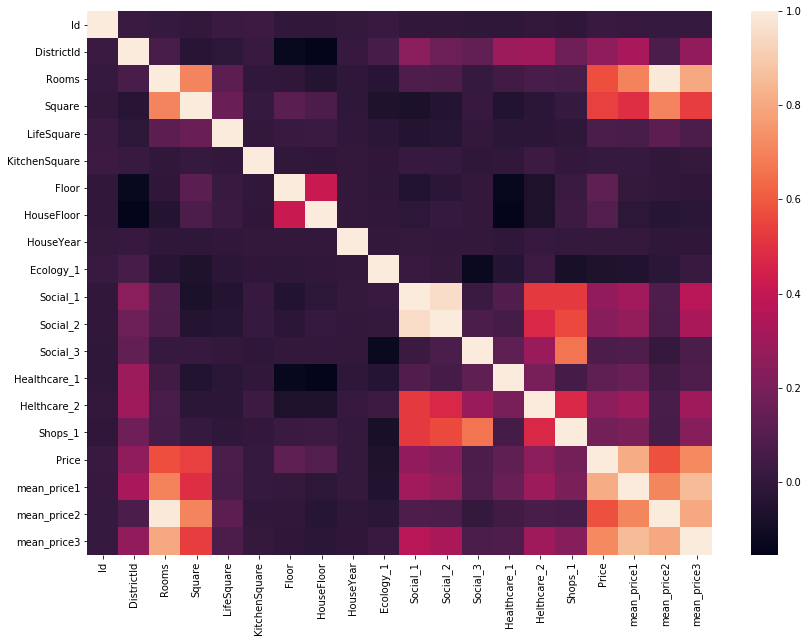

In [614]:
plt.rcParams['figure.figsize'] = (14.0, 10.0)
corr = train.corr()
sns.heatmap(corr)

In [615]:
print (corr['Price'].sort_values(ascending=False)[:15], '\n') #top 15 values
print ('----------------------')
print (corr['Price'].sort_values(ascending=False)[-5:]) #last 5 values`

Price           1.000000
mean_price1     0.814615
mean_price3     0.717471
mean_price2     0.577160
Rooms           0.571906
Square          0.536632
Social_1        0.265278
DistrictId      0.264105
Helthcare_2     0.253601
Social_2        0.240089
Shops_1         0.183545
Healthcare_1    0.131895
Floor           0.126098
HouseFloor      0.089321
Social_3        0.076234
Name: Price, dtype: float64 

----------------------
LifeSquare       0.072096
Id               0.019332
KitchenSquare    0.010375
HouseYear        0.005102
Ecology_1       -0.064129
Name: Price, dtype: float64


## Построение модели

### Модель

In [616]:
from sklearn.ensemble import RandomForestRegressor as RF

In [617]:
model = RF(n_estimators=1000, max_depth=11, min_samples_leaf=2, random_state=42)

In [618]:
feats = ['Square', 'Rooms', 'mean_price1', 'mean_price3', 'Social_1', 'DistrictId', 'Helthcare_2', 'Social_2','Shops_1']

In [619]:
model.fit(train.loc[:, feats], train['Price'])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=11,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=2, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

### Оценка результатов моделирования

In [620]:
from sklearn.metrics import r2_score as r2

In [621]:
def evaluate_model(df, model=model, feats=feats, check_r2='Yes'):
    pred = model.predict(df.loc[:, feats])
    if check_r2 == 'Yes':
        r2_ = r2(df['Price'], pred)
        print(f'Коэф. детерминации R2: {r2_}')
    return pred

In [622]:
pred_train = evaluate_model(train)

Коэф. детерминации R2: 0.8775518636309275


In [623]:
pred_train = evaluate_model(valid)

Коэф. детерминации R2: 0.6781343388994757


In [624]:
# Визуальное отображение качества моделирования

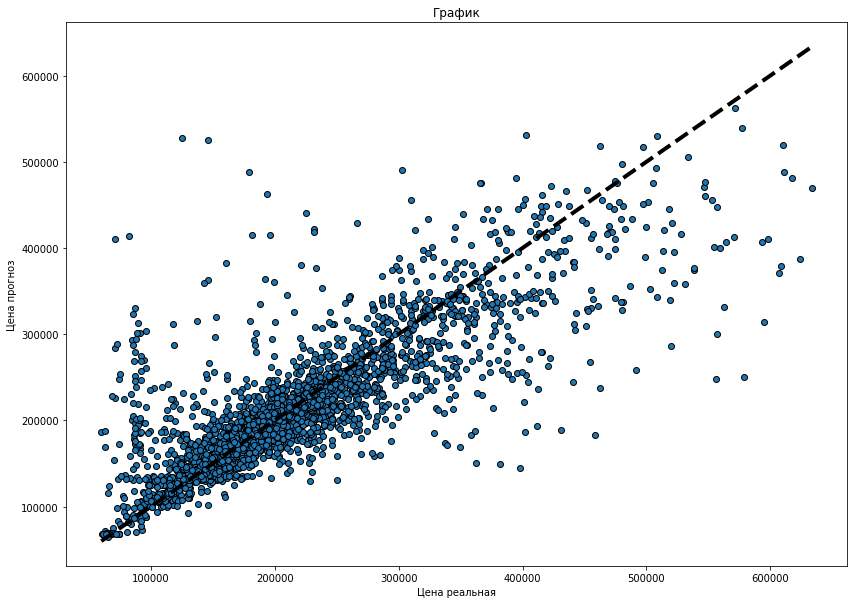

In [625]:
fig, ax = plt.subplots()
ax.scatter(valid['Price'], pred_valid, edgecolors=(0, 0, 0))
ax.plot([valid['Price'].min(), valid['Price'].max()], [valid['Price'].min(), valid['Price'].max()], 'k--', lw=4)
ax.set_xlabel('Цена реальная')
ax.set_ylabel('Цена прогноз')
ax.set_title("График")
plt.show()

# Прогнозирование цен из файла test.csv

In [626]:
test = pd.read_csv('input/test.csv')

In [627]:
test = prepare_data(test)

In [628]:
test['Price']  = evaluate_model(test, check_r2='No')

In [629]:
test.loc[:, ['Id', 'Price']].to_csv('SIvanov_predictions.csv', index=None)